In [1]:
from Allroute import *
import matplotlib.pyplot as plt
%matplotlib inline

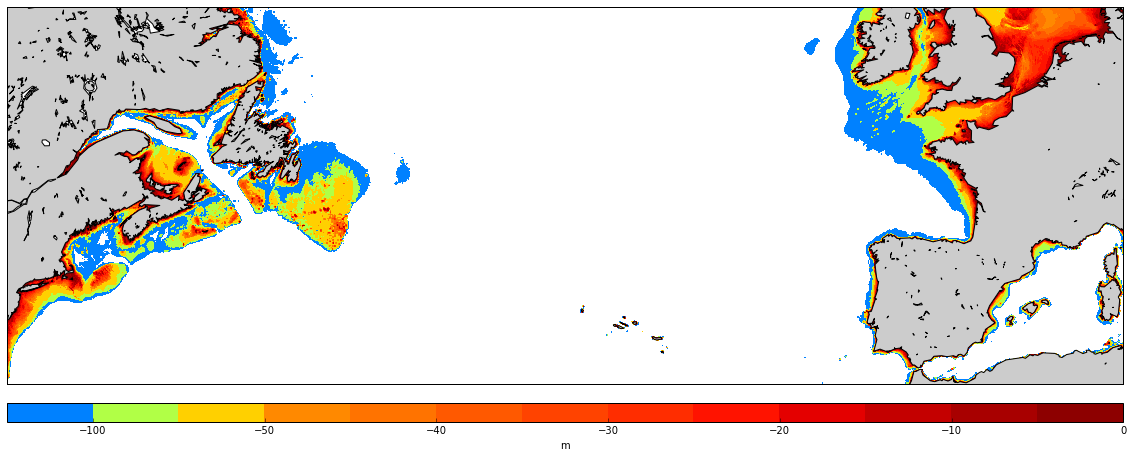

In [3]:
m = Basemap(
  projection="merc",
  resolution='l',
  area_thresh=0.1,
  llcrnrlon=-75,
  llcrnrlat=35,
  urcrnrlon=10,
  urcrnrlat=55
)
plt.figure(figsize=(20, 15))
lon, lat = np.meshgrid(bathymetry.longi[:], bathymetry.lati[:])
x, y = m(lon, lat)
clevs = [-200,-100,-75,-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0]
cs = m.contourf(x, y, bathymetry.elevation[:],clevs, shading='flat', cmap=plt.cm.jet)
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('m')
m.drawcoastlines()
m.fillcontinents()
plt.show()

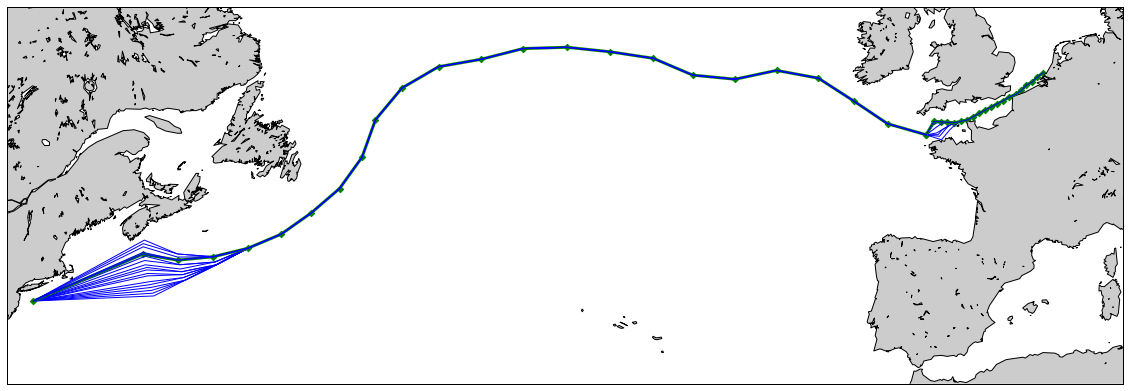

In [13]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# construct route 1
iso_set1 = isochrone(p_dep, p_des, 1, 30, 20, 1, 2, 30, 0, 0)
iso_path1 = construct_isopath(iso_set1)
ind1 = int(np.argwhere(iso_path1[:,-1,3] == min(iso_path1[:,-1,3])).ravel())
# lowest fuel consumption
tran_fuelc = iso_path1[ind1][-1, 3]
tran_timec = iso_path1[ind1][-1, 0]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
iso_set2 = isochrone(p_dep, p_des, 1, 20, 20, 6, 2, 20, tran_timec, tran_fuelc)
iso_path2 = construct_isopath(iso_set2)
ind2 = int(np.argwhere(iso_path2[:,-1,3] == min(iso_path2[:,-1,3])).ravel())


# drawing
plt.figure(figsize=(20, 15))
for num, ip in enumerate(iso_path1):
    longi = ip[:, 1]
    lati = ip[:, 2]
    x, y = m(longi, lati)
    if num == ind1:
        m.plot(x, y, marker=None, linewidth=3, color='g')
        m.scatter(x, y, marker='D',color='g')
    m.plot(x, y, marker=None, color='b')
for num, ip in enumerate(iso_path2):
    longi = ip[:, 1]
    lati = ip[:, 2]
    x, y = m(longi, lati)
    if num == ind2:
        m.plot(x, y, marker=None, linewidth=3, color='g')
        m.scatter(x, y, marker='D',color='g')
    m.plot(x, y, marker=None, color='b')
    
m.drawcoastlines()
m.fillcontinents()
plt.show()


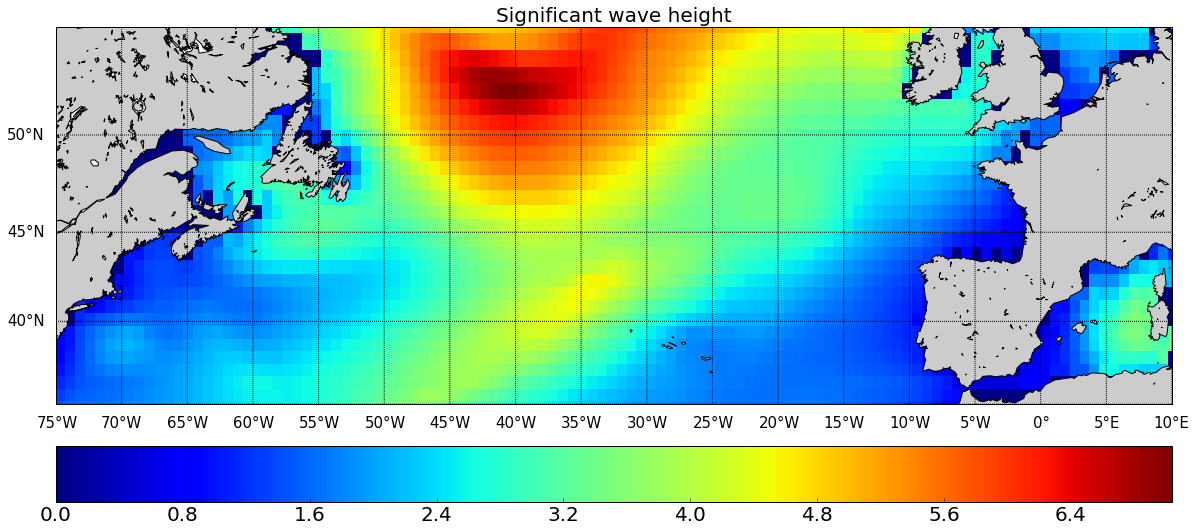

In [4]:
m = Basemap(
  projection="merc",
  resolution='l',
  area_thresh=0.1,
  llcrnrlon=-75,
  llcrnrlat=35,
  urcrnrlon=10,
  urcrnrlat=55
)
plt.figure(figsize=(20, 15))
plt.title('Significant wave height', fontsize = 20)
lon, lat = np.meshgrid(weather_info.lon, weather_info.lat)
x,y = m(lon,lat)
cs = m.pcolormesh(x, y, weather_info.Hs[:,:,0], shading='flat', cmap=plt.cm.jet)
cb = plt.colorbar(cs, orientation ='horizontal', fraction=0.15, pad=0.05)
cb.ax.tick_params(labelsize=20) 
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()

m.fillcontinents()
plt.show()

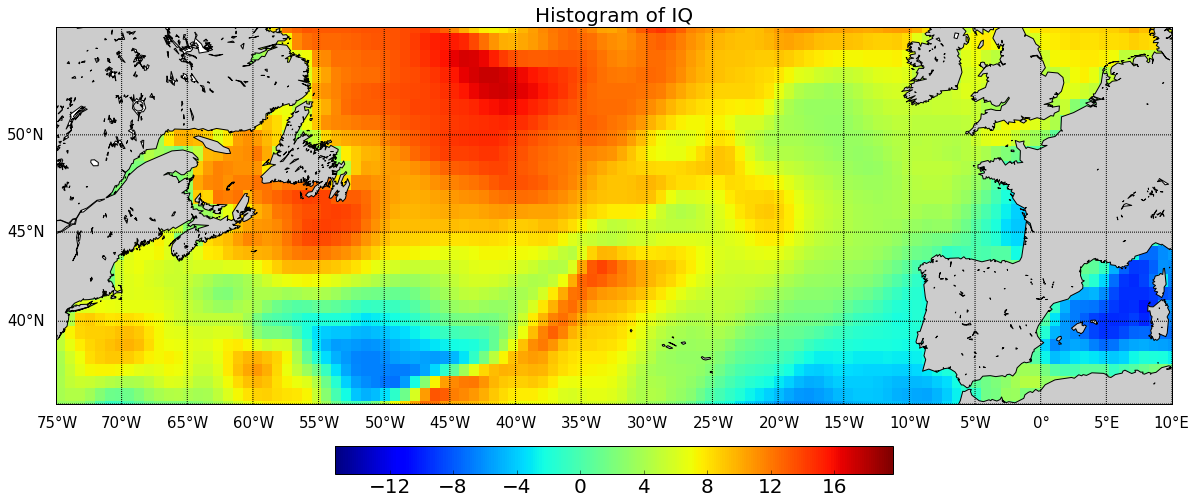

In [37]:
m = Basemap(
  projection="merc",
  resolution='l',
  area_thresh=0.1,
  llcrnrlon=-75,
  llcrnrlat=35,
  urcrnrlon=10,
  urcrnrlat=55
)
plt.figure(figsize=(20, 15))
plt.title('Histogram of IQ', fontsize = 20)
lon, lat = np.meshgrid(weather_info.lon, weather_info.lat)
x,y = m(lon,lat)
cs = m.pcolormesh(x, y, weather_info.U[:,:,0], shading='flat', cmap=plt.cm.jet)
cb = plt.colorbar(cs, orientation ='horizontal', fraction=0.1,shrink=.5, pad=0.05)
cb.ax.tick_params(labelsize=20) 
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()

m.fillcontinents()
plt.show()

In [39]:
print weather_info.Met['Time'][1]

[ 735965.25]
